# **Medical Leaf Classification**
This is notebook for medical leaf image classification. For "Tumbuhin" app.
<br>
This classification used TensorFlow-Lite Model Maker
<br>
<br>
for more detail about TFLite Model Maker, click link below:
<br>
https://www.tensorflow.org/lite/guide/model_maker
<br>
<br>
*NB: Please try this notebook on Google Colab*
<br>
<br>
### **1). Install TensorFlow-Lite Model Maker**
Run cell below to ensure your machine have installed tflite-model-maker library

In [1]:
!pip install tflite-model-maker

### **2). Import Required Libraries**
Import tflite-model-maker below for image processing preparation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os

import seaborn as sn
from sklearn.metrics import confusion_matrix

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

### **3). Locate the Datasets**
Here, you must locate the datasets location/directory.

In [3]:
image_path = "/content/drive/MyDrive/Datasets"

### **4). Load the Datasets**
Load datasets using DataLoader

In [4]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 1376, num_label: 23, labels: Alpinia_galanga, Amaranthus_viridis, Andrographis_paniculata, Artocarpus_heterophyllus, Azadirachta_indica, Basella_alba, Brassica_juncea, Carissa_carandas, Citrus_limon, Curcuma_zedoaria, Ficus_auriculata, Hibiscus_rosa-sinensis, Jasminum_sp, Mangifera_indica, Mentha_sp, Moringa_oleifera, Nyctanthes_arbor-tristis, Ocimum_tenuiflorum, Piper_betle, Plectranthus_amboinicus, Pongamia_pinnata, Psidium_guajava, Tinospora_cordifolia.


### **5). Distribute/split the Datasets**
Split the datasets into train-test-validation

Train 80% per class/labels

Test 10% per class/labels

Validation 10% per class/labels

In [5]:
train_data, rest_data = data.split(0.8) # 80% for training
validation_data, test_data = rest_data.split(0.5) # 10% for testing, 10% for validation

### **6). Display Random Images**
Display random images from datasets before continue

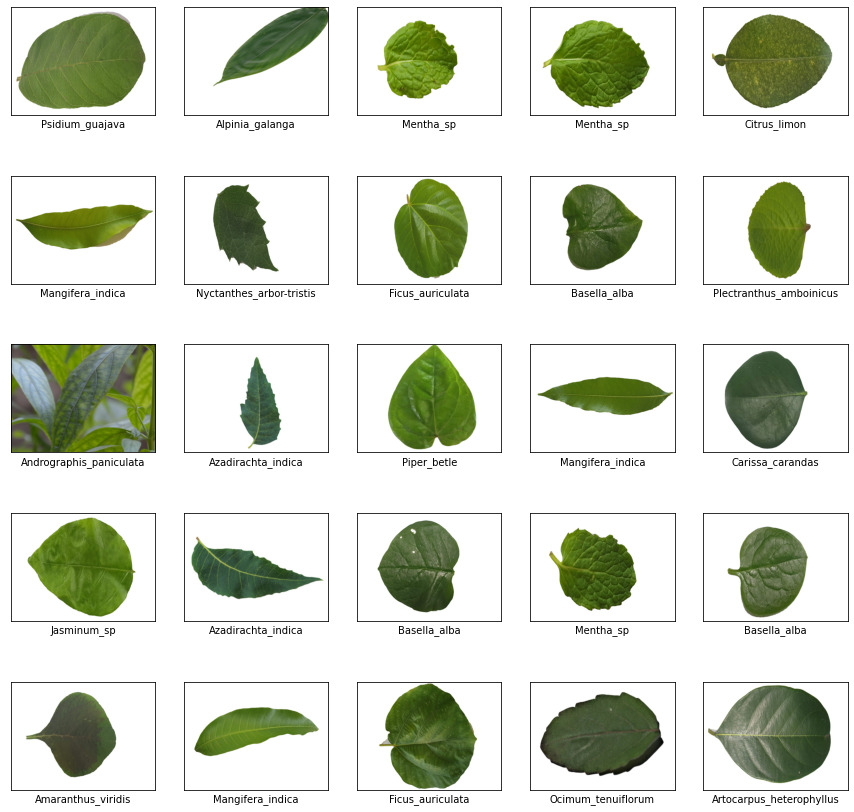

In [6]:
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(
    data.gen_dataset().unbatch().take(25)):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])

plt.show()

### **7). Use Pre-trained Model**
Here, we use EfficientNet Lite1 as a base model for image classification and build custom tflite model

More info, click here:
<br>
https://blog.tensorflow.org/2020/03/higher-accuracy-on-vision-models-with-efficientnet-lite.html

In [7]:
efficientnet_model = model_spec.get("efficientnet_lite1")

### **8). Training and Creating**
Here, we begin train the entire datasets and also create custom model based on pre-trained model

In [8]:
model = image_classifier.create(train_data,
                                epochs=10,
                                validation_data=validation_data,
                                use_augmentation=True,
                                shuffle=True,
                                model_spec=efficientnet_model)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 4,218,807
Trainable params: 29,463
Non-trainable params: 4,189,344
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


34/34 [==============================] - 86s 2s/step - loss: 2.7567 - accuracy: 0.2390 - val_loss: 1.9876 - val_accuracy: 0.6250
Epoch 2/10
34/34 [==============================] - 82s 2s/step - loss: 1.8609 - accuracy: 0.6369 - val_loss: 1.3834 - val_accuracy: 0.8672
Epoch 3/10
34/34 [==============================] - 81s 2s/step - loss: 1.5233 - accuracy: 0.7574 - val_loss: 1.1455 - val_accuracy: 0.9297
Epoch 4/10
34/34 [==============================] - 81s 2s/step - loss: 1.3485 - accuracy: 0.8143 - val_loss: 1.0404 - val_accuracy: 0.9375
Epoch 5/10
34/34 [==============================] - 82s 2s/step - loss: 1.2712 - accuracy: 0.8529 - val_loss: 0.9798 - val_accuracy: 0.9453
Epoch 6/10
34/34 [==============================] - 81s 2s/step - loss: 1.1722 - accuracy: 0.8805 - val_loss: 0.9361 - val_accuracy: 0.9609
Epoch 7/10
34/34 [==============================] - 81s 2s/step - loss: 1.1635 - accuracy: 0.8713 - val_loss: 0.9049 - val_accuracy: 0.9688
Epoch 8/10
34/34 [=============

### **9). Display Model Summary**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 23)                29463     
Total params: 4,218,807
Trainable params: 29,463
Non-trainable params: 4,189,344
_________________________________________________________________


### **10). Display Model Training-Validation Loss and Accuracy**

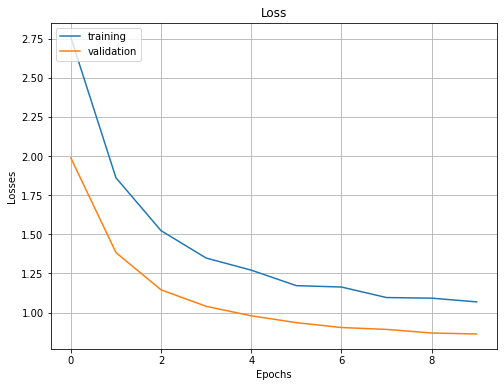

In [10]:
%matplotlib inline

#Loss graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

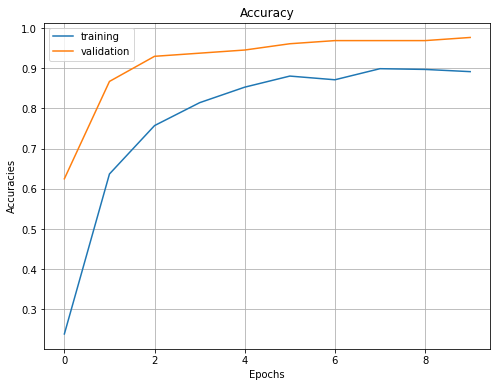

In [11]:
#Accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracies")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

### **11). Evaluate the Model**
Evaluate the model using test data

In [12]:
model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


5/5 [==============================] - 18s 1s/step - loss: 0.8711 - accuracy: 0.9855


[0.8711000084877014, 0.9855072498321533]

### **12). Display Random Predicted Images**
Display info about predicted image, we can see if the image was predicted correctly or not

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


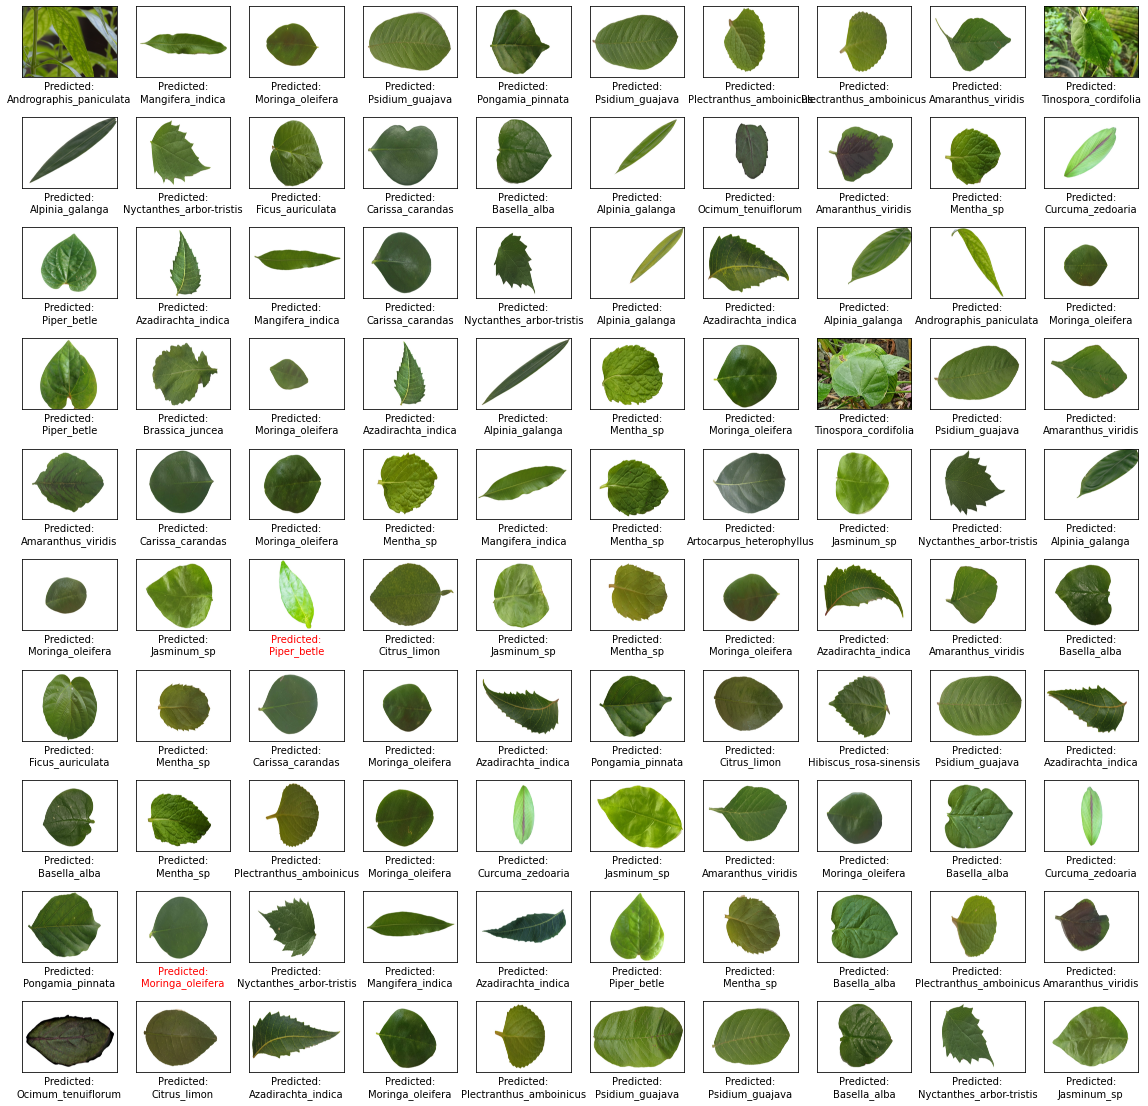

In [13]:
def get_label_color(predict_label, actual_label):
  if predict_label == actual_label:
    return "black"
  else:
    return "red"

plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(
    test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap="Greys")

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel("Predicted:\n{}".format(predict_label))

plt.show()

### **13). Display the Confusion Matrix**
Display info about prediction result in confusion matrix

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


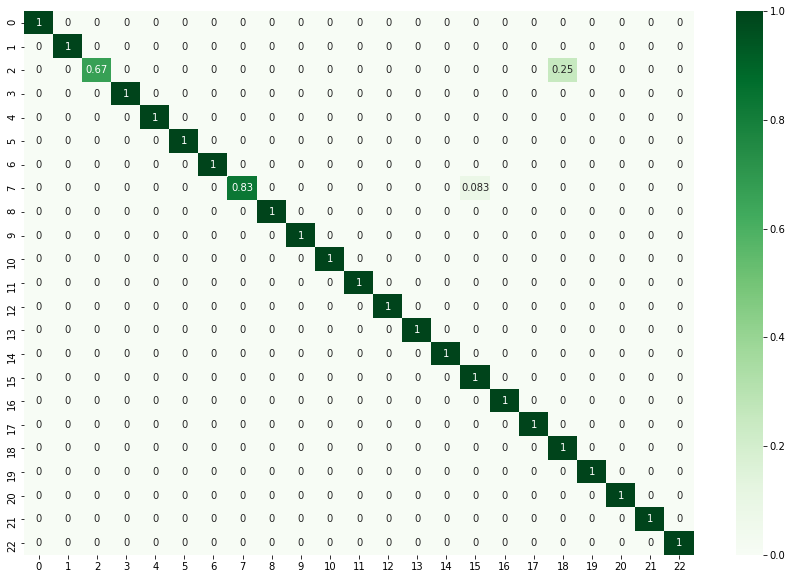

In [14]:
labels = os.listdir(os.path.join(image_path))
labels.sort()

label_dicts = {}

for i in range(len(labels)):
  label_dicts[labels[i]] = i

predicts = model.predict_top_k(test_data)
predict_labels = [ label_dicts[predicts[i][0][0]]
                  for i, (image, label) in enumerate(test_data.gen_dataset().unbatch()) ]

actual_labels = [ label.numpy()
                  for i, (image, label) in enumerate(test_data.gen_dataset().unbatch()) ]

plt.figure(figsize=(15, 10))
medleaf_cm = confusion_matrix(y_true=actual_labels, y_pred=predict_labels)
medleaf_cm = medleaf_cm / medleaf_cm.sum(axis=1) # To display conf. matrix in percetage %

sn.heatmap(medleaf_cm, annot=True, cmap="Greens")

### **14). Deployment**
Export/deploy into TFLite Model File. Use for Android "Tumbuhin" app

In [15]:
model.export(export_dir=".")

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmpyyd00lzv/assets


INFO:tensorflow:Assets written to: /tmp/tmpyyd00lzv/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmplqez6dhc/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmplqez6dhc/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


For exporting labels only

In [16]:
model.export(export_dir=".", export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


### **15). Evaluate The TFLite Model**
Evaluate the TFLite Model with test data (again)

In [17]:
model.evaluate_tflite("model.tflite", test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.9855072463768116}

### **16). Post Training/Model Quantization (Optional)**
Post-training quantization is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator latency, with little degradation in model accuracy. Thus, it's widely used to optimize the model.
<br>
<br>
More info about post training/quantization, click link below:
<br>
https://www.tensorflow.org/lite/performance/post_training_quantization

In [18]:
quantizer = QuantizationConfig.for_int8(representative_data=test_data)

model.export(export_dir=".", quantization_config=quantizer)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmp67giibho/assets


INFO:tensorflow:Assets written to: /tmp/tmp67giibho/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp5eg0pj4y/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp5eg0pj4y/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [20]:
model.evaluate_tflite("model.tflite", test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.9855072463768116}